In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
qpcr_data = pd.read_csv('APA_Paper_control_qPCR_Yoseop_Aug2025.txt', sep='\t')[['RBP', 'log2_qpcr', 'reporter', 'stars']]

In [3]:
qpcr_data

,RBP,log2_qpcr,reporter,stars
0,CPSF5,2.258330,upstream,****
1,CPSF5,2.555763,upstream,****
2,CPSF5,2.636102,upstream,****
3,CPSF6,1.041944,upstream,**
4,CPSF6,1.115767,upstream,**
5,CPSF6,0.813659,upstream,**
6,hnrnpcl1,-1.197566,upstream,*
7,hnrnpcl1,-0.374281,upstream,*
8,hnrnpcl1,-0.971162,upstream,*
9,CPSF5,0.103978,downstream,ns


<Axes: xlabel='RBP', ylabel='log2_qpcr'>

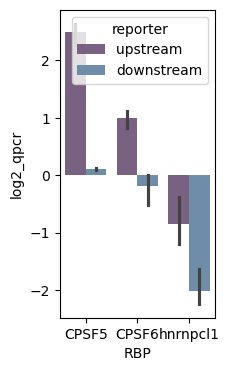

In [4]:
plt.rcParams['figure.figsize'] = (2, 4
                                  )
sns.barplot(data=qpcr_data,
            x='RBP',
            y='log2_qpcr',
            hue='reporter',
           palette=['#7C5D86', '#668EB1'])

In [5]:
stars_df= qpcr_data.groupby(['RBP', 'reporter', 'stars']).mean('log2_qpcr').reset_index().sort_values(by='reporter', ascending = False).reset_index()
stars_dict = dict(zip(stars_df.index, stars_df.stars))

In [6]:
stars_dict

{0: '****', 1: '**', 2: '*', 3: 'ns', 4: 'ns', 5: '****'}

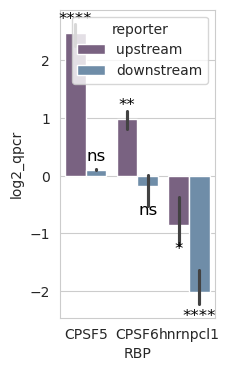

In [7]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (2, 4
                                  )
ax = sns.barplot(
    data=qpcr_data,
    x='RBP',
    y='log2_qpcr',
    hue='reporter',
    palette=['#7C5D86', '#668EB1']
)

# Add stars above bars
for i, p in enumerate(ax.patches):
    # Find corresponding star text
    if i in stars_dict.keys():
        star_label = stars_dict[i]
        # Get bar height
        height = p.get_height()
        if height > 0:
            # Annotate
            ax.text(
                p.get_x() + p.get_width()/2.,  # bar midpoint
                height + 0.1,                  # just above bar
                star_label,
                ha="center", va="bottom",
                fontsize=12, color="black"
            )
        else:
            ax.text(
                p.get_x() + p.get_width()/2.,  # bar midpoint
                height - 0.55,                  # just above bar
                star_label,
                ha="center", va="bottom",
                fontsize=12, color="black"
            )

plt.savefig('qPCR_controls_Yoseop_revision_log2.png')
plt.savefig('qPCR_controls_Yoseop_revision_log2.jpg')
plt.savefig('qPCR_controls_Yoseop_revision_log2.svg')

plt.show()
